<a href="https://colab.research.google.com/github/navyasaini/AIMLMonth2023/blob/main/23253_NavyaSaini_MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hepatitis C Prediction**

--------------------------------------------------------------

**TASK 1 - Exploratory Data Analysis**

In [101]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
from google.colab import files
uploaded=files.upload()

Saving HepatitisCdata.csv to HepatitisCdata (2).csv


--------------------------------------------------------------

**QUESTION 1**
Are there any missing values in the dataset? If so, how will you handle them? What is the distribution of different diagnosis categories in the dataset?

In [ ]:
#import dataset
dataset= pd.read_csv('HepatitisCdata.csv')
#preview dataset
dataset.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
#to check the missing values in the dataset
missing_data = dataset.isnull().sum()

#print the columns with missing data
print("Columns with missing data:")
for column, count in missing_data.items():
    if count > 0:
        print(f"{column}: {count} missing values")

Columns with missing data:
ALB: 1 missing values
ALP: 18 missing values
ALT: 1 missing values
CHOL: 10 missing values
PROT: 1 missing values


In [ ]:
#to handle the missing values in the dataset
dataset = dataset.fillna(dataset.mean())
#to check if missing values have been handled
missing_data_after = dataset.isnull().sum()
print("Columns with missing data after handling:")
for column, count in missing_data_after.items():
    if count > 0:
        print(f"{column}: {count} missing values")

Columns with missing data after handling:


In [ ]:
print(dataset.columns)

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [ ]:
#distribution of different diagnosis categories in the dataset
diagnosis_counts = dataset['Category'].value_counts()
print("Distribution of Diagnosis Categories:")
for category, count in diagnosis_counts.items():
    print(f"{category}: {count} occurrences")

Distribution of Diagnosis Categories:
0=Blood Donor: 533 occurrences
3=Cirrhosis: 30 occurrences
1=Hepatitis: 24 occurrences
2=Fibrosis: 21 occurrences
0s=suspect Blood Donor: 7 occurrences


**Summarizing my analysis and observation** :
This dataset has many missing values as displayed above.To handle the missing values in the dataset we took mean of the values.At last the distribution of different diagnosis categories exhibited the diseases and their occurences.

--------------------------------------------------------------

**QUESTION 2**
Perform feature encoding or transformation on categorical variables (such as sex) in the dataset. Which encoding technique would be most suitable?

In [ ]:
#encoding categorical value- category
category_encoded = pd.get_dummies(dataset['Category'], prefix='Category')
#encoding categorical value- sex
sex_encoded = pd.get_dummies(dataset['Sex'], prefix='Sex', drop_first=True)

encoded_dataset = pd.concat([dataset, category_encoded, sex_encoded], axis=1)
encoded_dataset = pd.concat([dataset, category_encoded, sex_encoded], axis=1)
print(encoded_dataset.head())

   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  Category_0=Blood Donor  \
0  3.23  106.0  12.1  69.0                       1   
1  4.80   74.0  15.6  76.5                       1   
2  5.20   86.0  33.2  79.3                       1   
3  4.74   80.0  33.8  75.7                       1   
4  4.32   76.0  29.9  68.7                       1   

   Category_0s=suspect Blood Donor  Category_1=Hepatitis  Category_2=Fibrosis  \
0                                0                     0                    0   
1                                0          

**Summarizing my analysis and observation:** For encoding categorical value category we use one-hot encoding to create binary columns for each category as it contains distinct categories whereas for sex we use binary coding as it is the gender and contains two categories male and female.

--------------------------------------------------------------

**QUESTION 3** Analyze the distribution and range of values for each clinical and demographic feature in the dataset. Are there any outliers or extreme values?


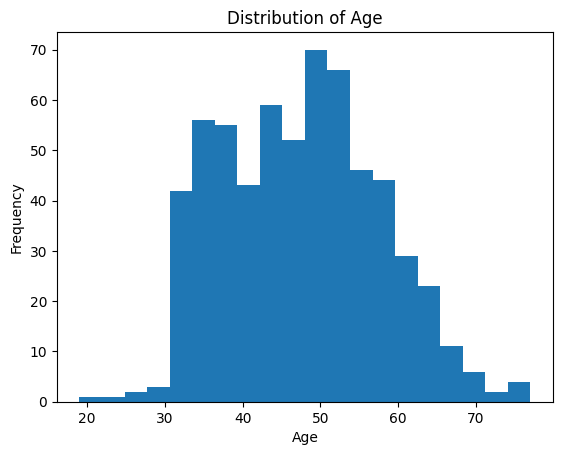

Summary statistics for Age:
  Minimum: 19
  Maximum: 77
  Mean: 47.41
  Median: 47.00
  Standard Deviation: 10.06



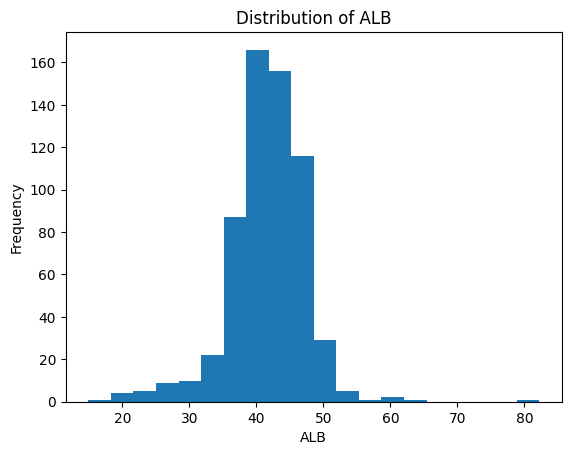

Summary statistics for ALB:
  Minimum: 14.9
  Maximum: 82.2
  Mean: 41.62
  Median: 41.90
  Standard Deviation: 5.78



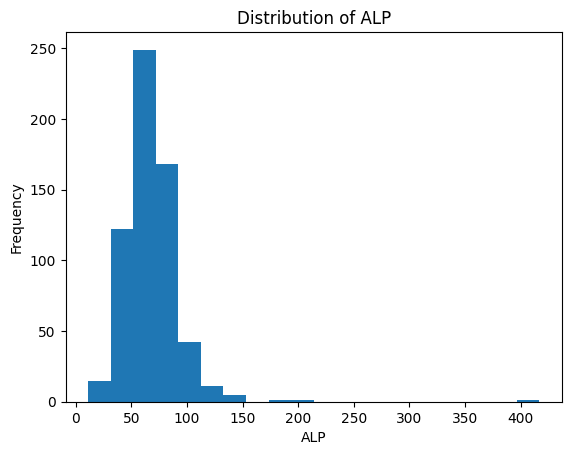

Summary statistics for ALP:
  Minimum: 11.3
  Maximum: 416.6
  Mean: 68.28
  Median: 66.70
  Standard Deviation: 25.64



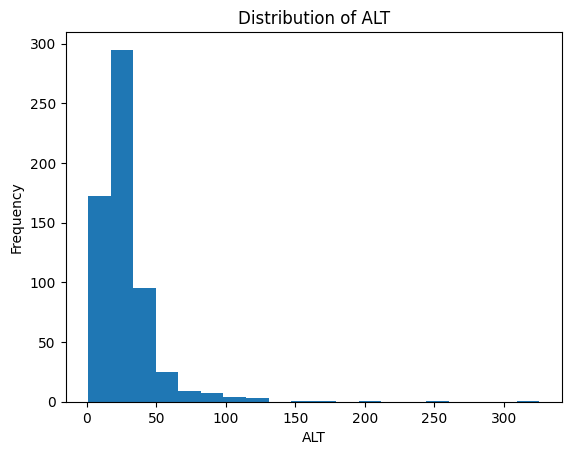

Summary statistics for ALT:
  Minimum: 0.9
  Maximum: 325.3
  Mean: 28.45
  Median: 23.00
  Standard Deviation: 25.45



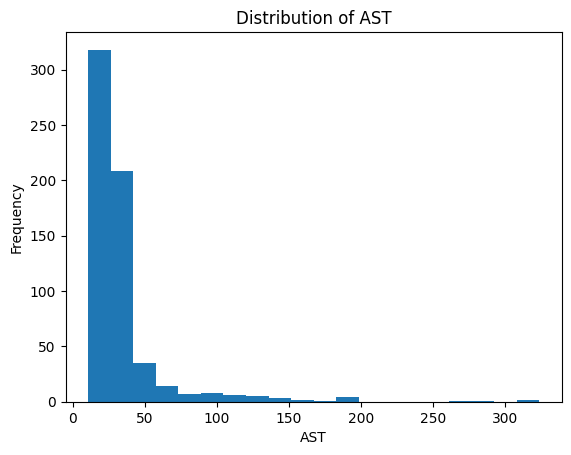

Summary statistics for AST:
  Minimum: 10.6
  Maximum: 324.0
  Mean: 34.79
  Median: 25.90
  Standard Deviation: 33.09



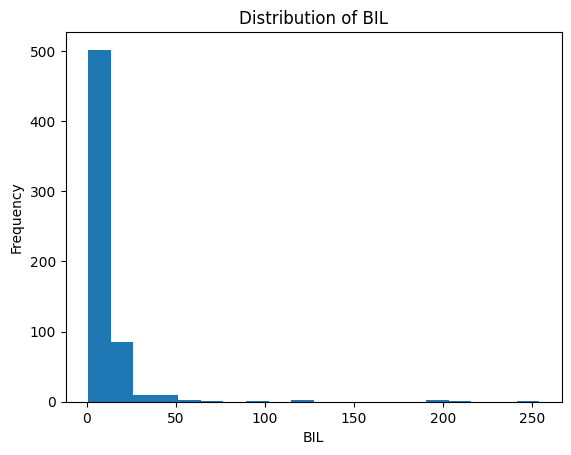

Summary statistics for BIL:
  Minimum: 0.8
  Maximum: 254.0
  Mean: 11.40
  Median: 7.30
  Standard Deviation: 19.67



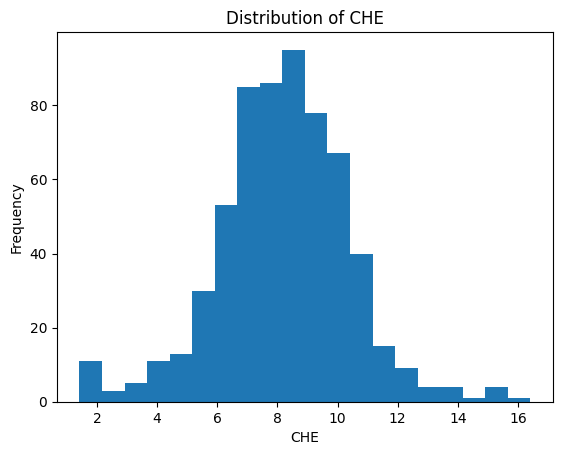

Summary statistics for CHE:
  Minimum: 1.42
  Maximum: 16.41
  Mean: 8.20
  Median: 8.26
  Standard Deviation: 2.21



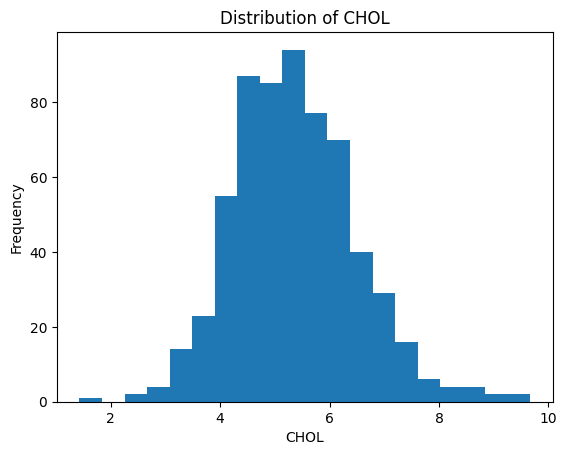

Summary statistics for CHOL:
  Minimum: 1.43
  Maximum: 9.67
  Mean: 5.37
  Median: 5.31
  Standard Deviation: 1.12



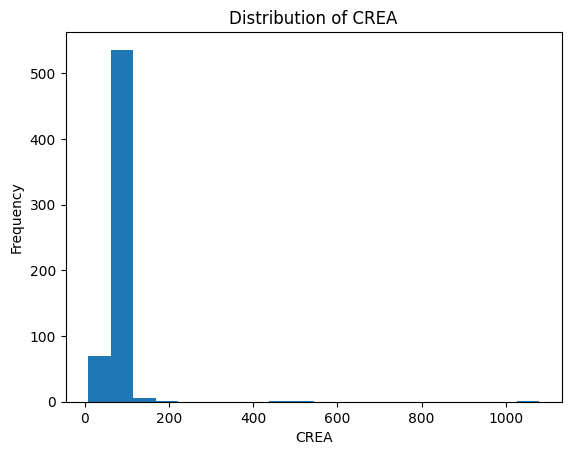

Summary statistics for CREA:
  Minimum: 8.0
  Maximum: 1079.1
  Mean: 81.29
  Median: 77.00
  Standard Deviation: 49.76



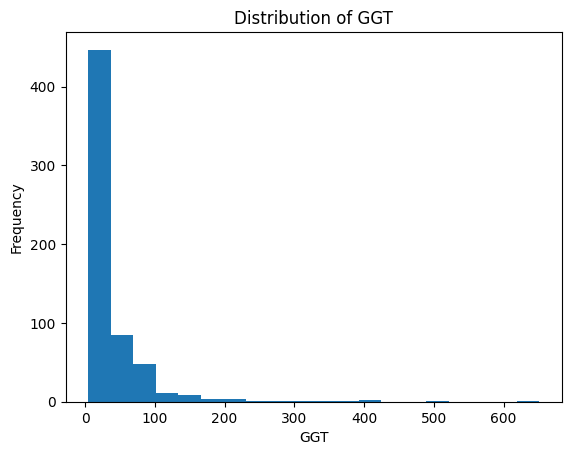

Summary statistics for GGT:
  Minimum: 4.5
  Maximum: 650.9
  Mean: 39.53
  Median: 23.30
  Standard Deviation: 54.66



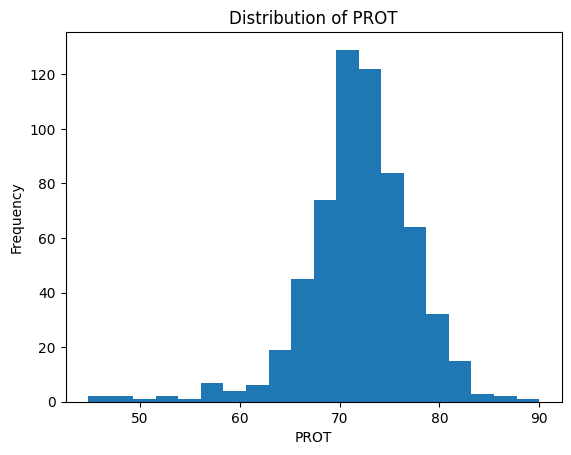

Summary statistics for PROT:
  Minimum: 44.8
  Maximum: 90.0
  Mean: 72.04
  Median: 72.20
  Standard Deviation: 5.40



In [ ]:
#columns (clinical and demographic features)
columns_of_interest = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

#analyse features
for column in columns_of_interest:
    min_value = dataset[column].min()
    max_value = dataset[column].max()
    mean_value = dataset[column].mean()
    median_value = dataset[column].median()
    std_value = dataset[column].std()

    #plot a histogram to visualize the distribution
    plt.figure()
    plt.hist(dataset[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

    #summary statistics
    print(f"Summary statistics for {column}:")
    print(f"  Minimum: {min_value}")
    print(f"  Maximum: {max_value}")
    print(f"  Mean: {mean_value:.2f}")
    print(f"  Median: {median_value:.2f}")
    print(f"  Standard Deviation: {std_value:.2f}")
    print()

**Summarizing my analysis and observation:** To analyse the distribution and range of values for every feature in the dataset we calculate the basic statistics like min max median mean median and standard deviation and plot histograms for easy visualisation of the dataset. Also BIl category has extreme values.

--------------------------------------------------------------

**QUESTION 4** Can you explore the correlations between features and the diagnosis of hepatitis C? Are there any strong correlations or dependencies?


In [ ]:
print(dataset.columns)

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [ ]:
print(dataset.head)

<bound method NDFrame.head of      Unnamed: 0       Category  Age Sex   ALB        ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.50000    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.30000   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.70000   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.00000   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.10000   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...        ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.60000    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.80000    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.30000    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0   68.28392   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0   68.28392  100.0   80.0  12.0   

       CH

In [ ]:
#explore the correlation between features and diagnosis of hepatitis C
category_mapping = {'0=Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 2, '3=Cirrhosis': 3}
dataset['Category'] = dataset['Category'].map(category_mapping)
correlation_matrix = dataset.corr()
print(correlation_matrix)

            Unnamed: 0  Category       Age       ALB       ALP       ALT  \
Unnamed: 0    1.000000  0.546629  0.420477 -0.309379  0.022402 -0.034996   
Category      0.546629  1.000000  0.124079 -0.313387  0.051908  0.094894   
Age           0.420477  0.124079  1.000000 -0.197005  0.168473 -0.006017   
ALB          -0.309379 -0.313387 -0.197005  1.000000 -0.138858  0.001606   
ALP           0.022402  0.051908  0.168473 -0.138858  1.000000  0.172461   
ALT          -0.034996  0.094894 -0.006017  0.001606  0.172461  1.000000   
AST           0.332626  0.645396  0.088666 -0.193397  0.062202  0.273325   
BIL           0.181459  0.499293  0.032492 -0.221650  0.048600 -0.038468   
CHE          -0.270549 -0.370050 -0.075093  0.375848  0.032971  0.146953   
CHOL         -0.085709 -0.304692  0.123978  0.204803  0.121914  0.068023   
CREA         -0.025987  0.203624 -0.022296 -0.001573  0.149554 -0.043025   
GGT           0.247781  0.477942  0.153087 -0.155555  0.442262  0.248086   
PROT        

In [ ]:
#display strong correlations or dependencies
threshold = 0.7
strong_correlations = correlation_matrix.abs() > threshold
strong_correlations = strong_correlations.mask(np.triu(np.ones(strong_correlations.shape)).astype(bool))
strong_correlation_pairs = strong_correlations.stack().reset_index()
strong_correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(strong_correlation_pairs)


   Feature 1   Feature 2 Correlation
0   Category  Unnamed: 0       False
1        Age  Unnamed: 0       False
2        Age    Category       False
3        ALB  Unnamed: 0       False
4        ALB    Category       False
..       ...         ...         ...
73      PROT         BIL       False
74      PROT         CHE       False
75      PROT        CHOL       False
76      PROT        CREA       False
77      PROT         GGT       False

[78 rows x 3 columns]


**Summarizing my analysis and observation:** We have explored the correlation between features and diagnosis of hepatitis C using the correlation matrix.  

--------------------------------------------------------------

**QUESTION 5** Are there imbalances in the distribution of positive and negative hepatitis C diagnoses, such as a higher frequency of one category? How might this impact the classification task, and how will you address it?


In [ ]:
category_counts = dataset['Category'].value_counts()
#Print the frequency distribution
print(category_counts)


0.0    533
3.0     30
1.0     24
2.0     21
Name: Category, dtype: int64


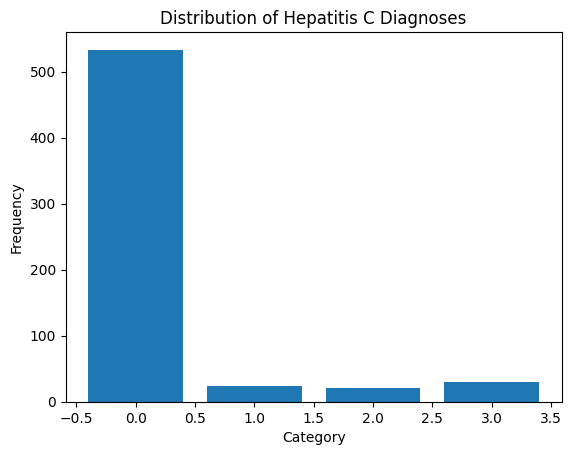

In [ ]:
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Hepatitis C Diagnoses')
plt.show()


On analysing the above graph we observe that there is imbalance in the distribution of positive and negative hepatitis C diagnoses.It can impact the classification task in the following ways:
**Bias:**The classifier may become biased towards the majority class (the category with higher frequency). This bias can lead to lower accuracy and poorer performance in predicting the minority class.
**Misclassification:**The classifier may struggle to accurately classify instances of the minority class due to the lack of sufficient training data. This can result in higher false negative or false positive rates for the minority class.

To address it we can adjust the class weights during training to give more importance to the minority class. This way, the classifier focuses more on correctly classifying instances from the minority class.

--------------------------------------------------------------

## **TASK 2 - Classification/Regression**

--------------------------------------------------------------

### Data Preprocessing

In [ ]:
print(dataset.head)

<bound method NDFrame.head of      Unnamed: 0  Category  Age Sex   ALB        ALP    ALT    AST   BIL  \
0             1       0.0   32   m  38.5   52.50000    7.7   22.1   7.5   
1             2       0.0   32   m  38.5   70.30000   18.0   24.7   3.9   
2             3       0.0   32   m  46.9   74.70000   36.2   52.6   6.1   
3             4       0.0   32   m  43.2   52.00000   30.6   22.6  18.9   
4             5       0.0   32   m  39.2   74.10000   32.6   24.8   9.6   
..          ...       ...  ...  ..   ...        ...    ...    ...   ...   
610         611       3.0   62   f  32.0  416.60000    5.9  110.3  50.0   
611         612       3.0   64   f  24.0  102.80000    2.9   44.4  20.0   
612         613       3.0   64   f  29.0   87.30000    3.5   99.0  48.0   
613         614       3.0   46   f  33.0   68.28392   39.0   62.0  20.0   
614         615       3.0   59   f  36.0   68.28392  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1

In [ ]:
print(dataset.keys)

<bound method NDFrame.keys of      Unnamed: 0  Category  Age Sex   ALB        ALP    ALT    AST   BIL  \
0             1       0.0   32   m  38.5   52.50000    7.7   22.1   7.5   
1             2       0.0   32   m  38.5   70.30000   18.0   24.7   3.9   
2             3       0.0   32   m  46.9   74.70000   36.2   52.6   6.1   
3             4       0.0   32   m  43.2   52.00000   30.6   22.6  18.9   
4             5       0.0   32   m  39.2   74.10000   32.6   24.8   9.6   
..          ...       ...  ...  ..   ...        ...    ...    ...   ...   
610         611       3.0   62   f  32.0  416.60000    5.9  110.3  50.0   
611         612       3.0   64   f  24.0  102.80000    2.9   44.4  20.0   
612         613       3.0   64   f  29.0   87.30000    3.5   99.0  48.0   
613         614       3.0   46   f  33.0   68.28392   39.0   62.0  20.0   
614         615       3.0   59   f  36.0   68.28392  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1

In [ ]:
dataset.name = 'my_dataframe'
print(dataset.name)

my_dataframe


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df=dataset.drop('Unnamed: 0', axis=1)

#encoding categorical variables
categorical_cols = ['Sex']
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

#split the data into features (X) and target (y)
X = df.drop('Category', axis=1)  # Features
y = df['Category']  # Target

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale numerical features
numerical_cols = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']  # List of numerical column names
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

now the data is preprocessed

--------------------------------------------------------------

### Feature Engineering

In [ ]:
#creating a new feature by combining existing features
df['ALB/AST'] = df['ALB'] / df['AST']

#transforming a feature using a mathematical function
df['log_ALP'] = np.log(df['ALP'])

#binning a numerical feature into categorical bins
bins = [0, 50, 100, np.inf]
labels = ['low', 'medium', 'high']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

#normalizing numerical features
numeric_cols = ['ALB', 'ALT', 'AST']
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

#to print the modified DataFrame
print(df.head())

   Category  Age  Sex       ALB   ALP       ALT       AST   BIL    CHE  CHOL  \
0       0.0   32    1 -0.540208  52.5 -0.815390 -0.383381   7.5   6.93  3.23   
1       0.0   32    1 -0.540208  70.3 -0.410658 -0.304809   3.9  11.17  4.80   
2       0.0   32    1  0.914106  74.7  0.304499  0.538328   6.1   8.84  5.20   
3       0.0   32    1  0.273516  52.0  0.084451 -0.368271  18.9   7.33  4.74   
4       0.0   32    1 -0.419015  74.1  0.163040 -0.301787   9.6   9.15  4.32   

    CREA   GGT  PROT   ALB/AST   log_ALP Age_Group  
0  106.0  12.1  69.0  1.742081  3.960813       low  
1   74.0  15.6  76.5  1.558704  4.252772       low  
2   86.0  33.2  79.3  0.891635  4.313480       low  
3   80.0  33.8  75.7  1.911504  3.951244       low  
4   76.0  29.9  68.7  1.580645  4.305416       low  


--------------------------------------------------------------

### Split dataset in train-test (80:20 ratio)

In [ ]:
from sklearn.model_selection import train_test_split

#splitting the dataset into features (X) and target variable (y)
X = df.drop('Category', axis=1)
y = df['Category']

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#to print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (492, 15) (492,)
Testing set shape: (123, 15) (123,)


we have used train_test_split function from scikit-learn library to split the dataset into training and testing sets. The test_size parameter is set to 0.2, indicating that 20% of the data will be used for testing.

--------------------------------------------------------------

### Model Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#split the dataset into train and test sets
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

#separate the features and the target variable in the train set
X_train = train_df.drop(columns=['Category'])
y_train = train_df['Category']

#preprocessing pipelines for numeric and categorical columns
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

#column transformer to apply different preprocessing pipelines to different columns
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, X_train.select_dtypes(include=['float', 'int']).columns),
    ('categorical', categorical_pipeline, X_train.select_dtypes(include=['object']).columns)
])

#transform the train set
X_train_transformed = preprocessor.fit_transform(X_train)

#reset indices of X_train_transformed and y_train
X_train_transformed = pd.DataFrame(X_train_transformed, index=X_train.index)
y_train = y_train.loc[X_train.index]

#handle missing values in the target variable
y_train_imputed = y_train.dropna()
X_train_imputed = X_train_transformed.loc[y_train_imputed.index]

#define the models to evaluate
models = [
    LogisticRegression(),
    RandomForestClassifier()
]

#perform model selection using cross-validation
for model in models:
    scores = cross_val_score(model, X_train_imputed, y_train_imputed, cv=5)  # 5-fold cross-validation
    avg_score = scores.mean()
    print(f"{model.__class__.__name__} - Average Accuracy: {avg_score:.2f}")


LogisticRegression - Average Accuracy: 0.95
RandomForestClassifier - Average Accuracy: 0.98


--------------------------------------------------------------

### Model Training

In [ ]:
print(dataset.head)

<bound method NDFrame.head of      Unnamed: 0  Category  Age Sex   ALB        ALP    ALT    AST   BIL  \
0             1       0.0   32   m  38.5   52.50000    7.7   22.1   7.5   
1             2       0.0   32   m  38.5   70.30000   18.0   24.7   3.9   
2             3       0.0   32   m  46.9   74.70000   36.2   52.6   6.1   
3             4       0.0   32   m  43.2   52.00000   30.6   22.6  18.9   
4             5       0.0   32   m  39.2   74.10000   32.6   24.8   9.6   
..          ...       ...  ...  ..   ...        ...    ...    ...   ...   
610         611       3.0   62   f  32.0  416.60000    5.9  110.3  50.0   
611         612       3.0   64   f  24.0  102.80000    2.9   44.4  20.0   
612         613       3.0   64   f  29.0   87.30000    3.5   99.0  48.0   
613         614       3.0   46   f  33.0   68.28392   39.0   62.0  20.0   
614         615       3.0   59   f  36.0   68.28392  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

#create the pipeline with imputer and classifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier())

#fit the pipeline on the training data
pipeline.fit(X_train_imputed, y_train)

#make predictions on the test set
y_pred = pipeline.predict(X_test_imputed)

In [ ]:
model.fit(X_train_imputed, y_train)


RandomForestClassifier()

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

#to check feature importances
importances = model.feature_importances_
print(importances)


[0.07496624 0.07264551 0.07028343 0.08322552 0.07719095 0.07734583
 0.08692036 0.08245361 0.0945909  0.08398428 0.09622628 0.06436617
 0.01416452 0.02163639]


In [ ]:
print("Shape of X_train_imputed:", X_train_imputed.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_imputed: (488, 14)
Shape of y_train: (488,)


In [ ]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

#create a new DataFrame with imputed values
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

#reset the indices of X_train_imputed to match the new indices of X_train
X_train_imputed.reset_index(drop=True, inplace=True)

#sssign the values of y_train based on the common indices
y_train = y_train.loc[X_train_imputed.index]


--------------------------------------------------------------

### Model Evaluation

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

#drop samples with missing target values from the test set
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

#make predictions on the cleaned test set
y_pred = model.predict(X_test_clean)

#calculate the accuracy score
accuracy = accuracy_score(y_test_clean, y_pred)

#print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 1.0


--------------------------------------------------------------

### Fine tune the model

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#create the feature selector object
estimator = RandomForestClassifier()  # Replace with your chosen estimator
feature_selector = RFE(estimator)

#set the desired number of features
n_features_to_select = 5
feature_selector.n_features_to_select = n_features_to_select

#fit the feature selector on the training data
feature_selector.fit(X_train_imputed, y_train)

#get the selected feature indices and column names
selected_feature_indices = feature_selector.support_
selected_feature_names = X_train.columns[selected_feature_indices]

#print the selected feature names
print("Selected Features:")
for feature_name in selected_feature_names:
    print(feature_name)


Selected Features:
ALB
ALP
CHE
CHOL
GGT


In [ ]:
#separate the selected features and target variable
X_selected = dataset[['ALB', 'ALP', 'CHE', 'CHOL', 'GGT']]
y = dataset['Category']

#handle missing values in the feature matrix and target variable
data = pd.concat([X_selected, y], axis=1)
data = data.dropna()

#separate the updated features (X) and target variable (y)
X_selected = data.drop('Category', axis=1)
y = data['Category']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9016393442622951


--------------------------------------------------------------

### Make Predictions

In [ ]:
#use the best model from grid search
best_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50)

#fit the best model on the training data
best_model.fit(X_train, y_train)

#make predictions on the test data
y_pred = best_model.predict(X_test)

#print the predicted values
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 3. 0. 0. 1. 0. 0. 0. 0. 0. 3. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0.]


--------------------------------------------------------------

### **Summarize my model's performance by evaluation metrices**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#make predictions on the test data
y_pred = best_model.predict(X_test)

#to calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#to calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

#to calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

#to calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

#print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8852459016393442
Precision: 0.8512479692807561
Recall: 0.8852459016393442
F1-score: 0.8675552714693939


The **accuracy** of my model is **0.885**, indicating it correctly predicts the category for 88.5% of the samples.
The **precision** score of **0.851** suggests that when the model predicts a positive category, it is correct around 85.1% of the time.
The **recall** score of **0.885** indicates that the model can identify around 88.5% of the positive samples correctly.
The **F1-score** of **0.868** indicates that my model achieved a good balance between precision and recall.

--------------------------------------------------------------